In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vgg16-features-augmented/X_vgg16_features.npy
/kaggle/input/vgg16-features-augmented/augmented_Y.npy
/kaggle/input/pca-features-vgg16/pca_features.npy


In [2]:
import numpy as np
X = np.load('/kaggle/input/pca-features-vgg16/pca_features.npy')
y = np.load('/kaggle/input/vgg16-features-augmented/augmented_Y.npy')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape)

(2421, 3000)


**Random Forest without cross validation**

Test Accuracy: 0.6898
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        99
           1       1.00      0.30      0.47        69
           2       0.63      0.99      0.77       303
           3       0.83      0.48      0.61       135

    accuracy                           0.69       606
   macro avg       0.85      0.53      0.58       606
weighted avg       0.77      0.69      0.66       606



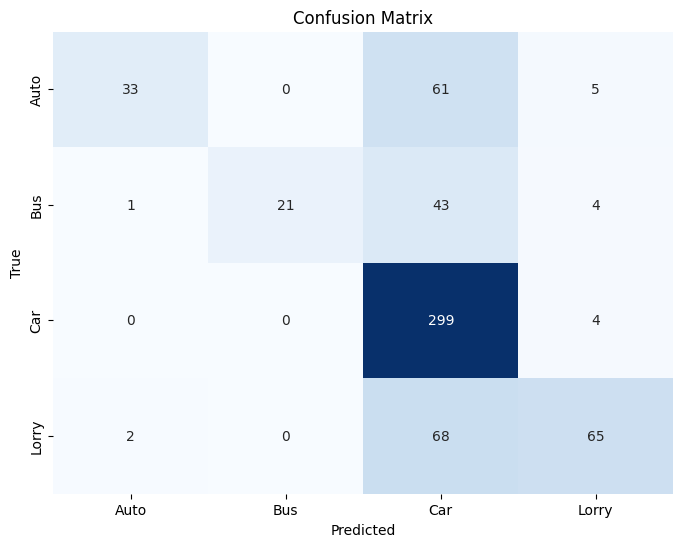

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Random Forest with cross validation**

Cross-Validation Scores: [0.56907216 0.58884298 0.54545455 0.55371901 0.5661157 ]
Mean Accuracy: 0.5646
Test Accuracy: 0.6403
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        99
           1       1.00      0.09      0.16        69
           2       0.58      1.00      0.74       303
           3       0.97      0.44      0.60       135

    accuracy                           0.64       606
   macro avg       0.89      0.43      0.46       606
weighted avg       0.78      0.64      0.58       606



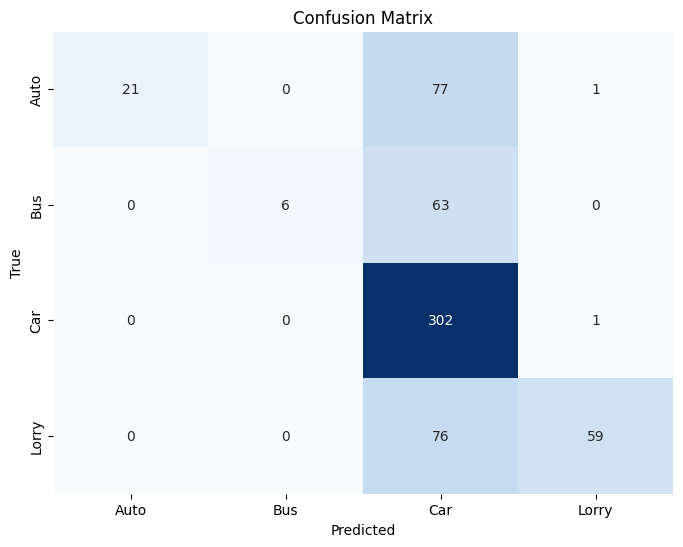

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8)

# Perform cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Logistic Regression without cross validation**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.9604
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        99
           1       0.93      0.94      0.94        69
           2       0.98      0.99      0.99       303
           3       0.95      0.92      0.94       135

    accuracy                           0.96       606
   macro avg       0.95      0.95      0.95       606
weighted avg       0.96      0.96      0.96       606



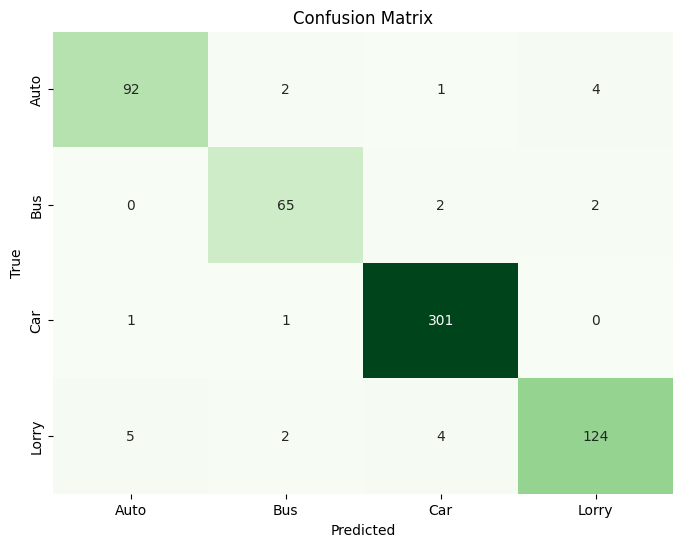

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the entire training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Logistic Regression with cross validation**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.90515464 0.91942149 0.89669421 0.92561983 0.91528926]
Mean Accuracy: 0.9124


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.9274
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        99
           1       0.88      1.00      0.94        69
           2       0.97      0.95      0.96       303
           3       0.90      0.89      0.89       135

    accuracy                           0.93       606
   macro avg       0.91      0.93      0.92       606
weighted avg       0.93      0.93      0.93       606



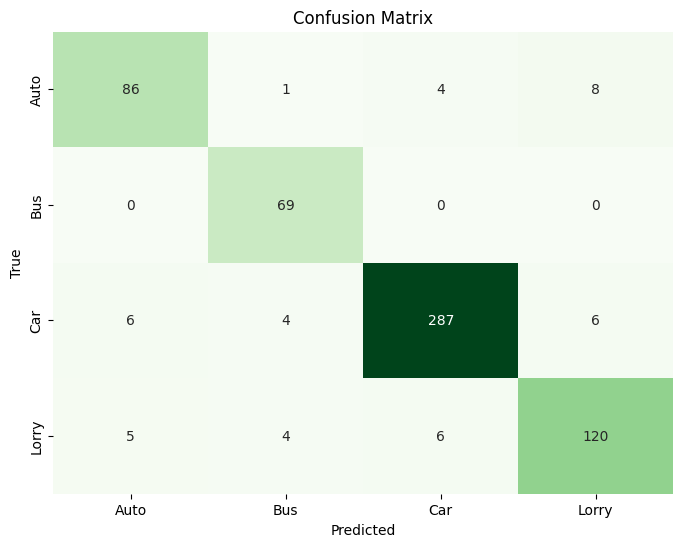

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=100)

# Perform cross-validation on the training set
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**KNN without cross validation**

Test Accuracy: 0.6848
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        99
           1       0.60      0.45      0.51        69
           2       0.83      0.83      0.83       303
           3       0.53      0.59      0.56       135

    accuracy                           0.68       606
   macro avg       0.62      0.60      0.61       606
weighted avg       0.69      0.68      0.68       606



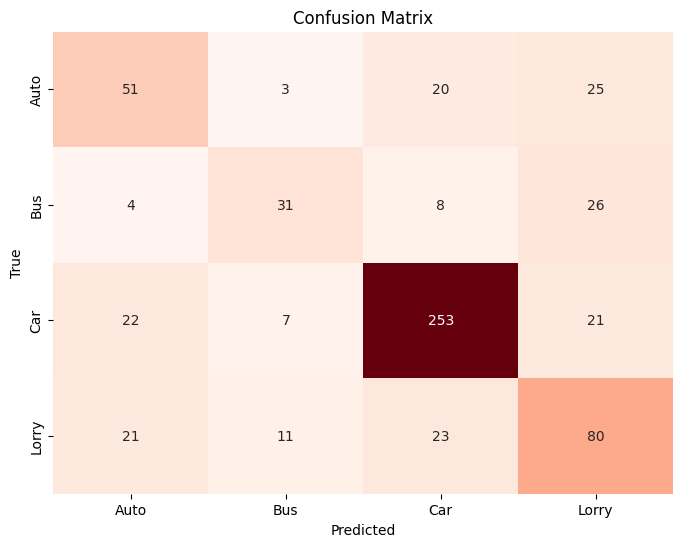

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a K-Nearest Neighbors model with, for example, k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the entire training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**KNN with cross validation**

Cross-Validation Scores: [0.55051546 0.56818182 0.54958678 0.54958678 0.5661157 ]
Mean Accuracy: 0.5568
Test Accuracy: 0.6205
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.13      0.22        99
           1       0.93      0.20      0.33        69
           2       0.61      0.96      0.75       303
           3       0.59      0.42      0.49       135

    accuracy                           0.62       606
   macro avg       0.71      0.43      0.45       606
weighted avg       0.66      0.62      0.56       606



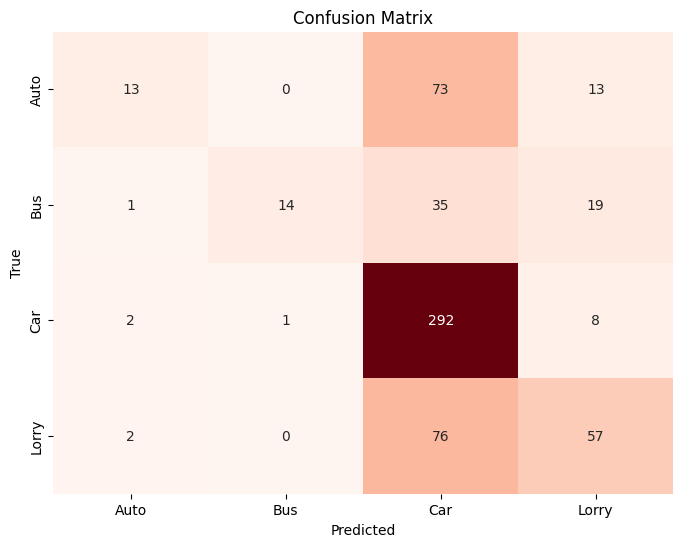

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a K-Nearest Neighbors model with, for example, k=5
knn_model = KNeighborsClassifier(n_neighbors=15, p=1)

# Perform cross-validation on the training set
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Decision Tree without cross validation**

Test Accuracy: 0.6848
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51        99
           1       0.51      0.59      0.55        69
           2       0.84      0.76      0.80       303
           3       0.61      0.67      0.64       135

    accuracy                           0.68       606
   macro avg       0.62      0.64      0.63       606
weighted avg       0.70      0.68      0.69       606



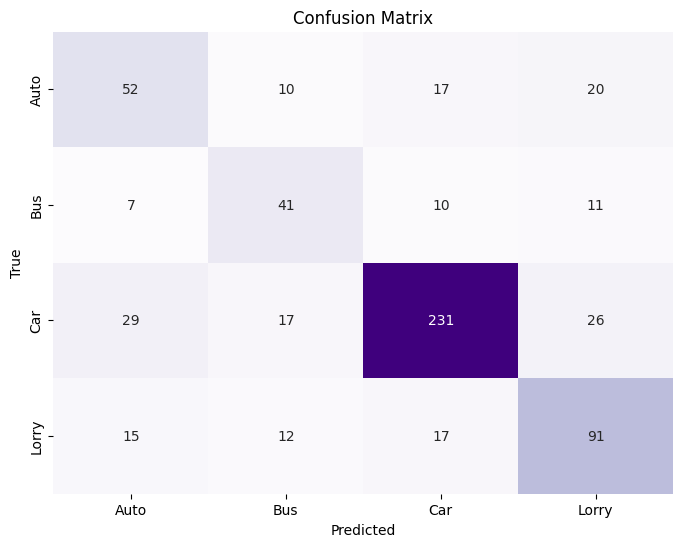

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the entire training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Decision Tree with cross validation**

Cross-Validation Scores: [0.59175258 0.57231405 0.57438017 0.55578512 0.55165289]
Mean Accuracy: 0.5692
Test Accuracy: 0.6287
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.44      0.47        99
           1       0.49      0.33      0.40        69
           2       0.78      0.74      0.76       303
           3       0.49      0.67      0.57       135

    accuracy                           0.63       606
   macro avg       0.57      0.55      0.55       606
weighted avg       0.64      0.63      0.63       606



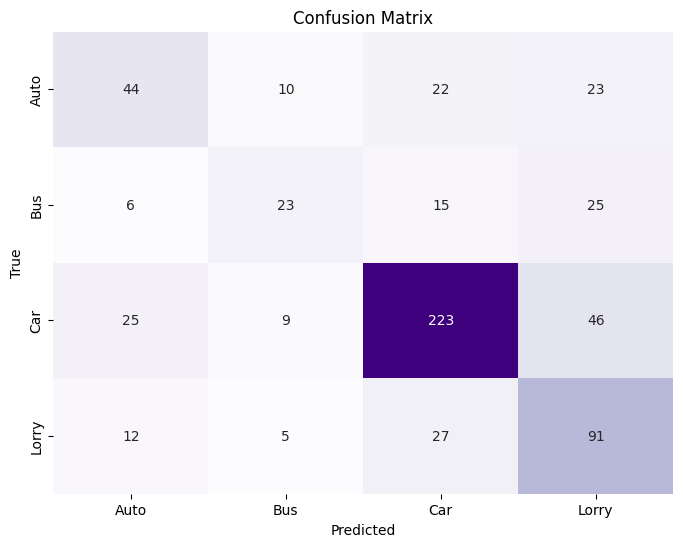

In [28]:
##### import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=7, random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Naive Bayes without cross validation**

Test Accuracy: 0.3762
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        99
           1       0.18      0.48      0.26        69
           2       0.61      0.42      0.50       303
           3       0.32      0.33      0.32       135

    accuracy                           0.38       606
   macro avg       0.36      0.36      0.34       606
weighted avg       0.45      0.38      0.39       606



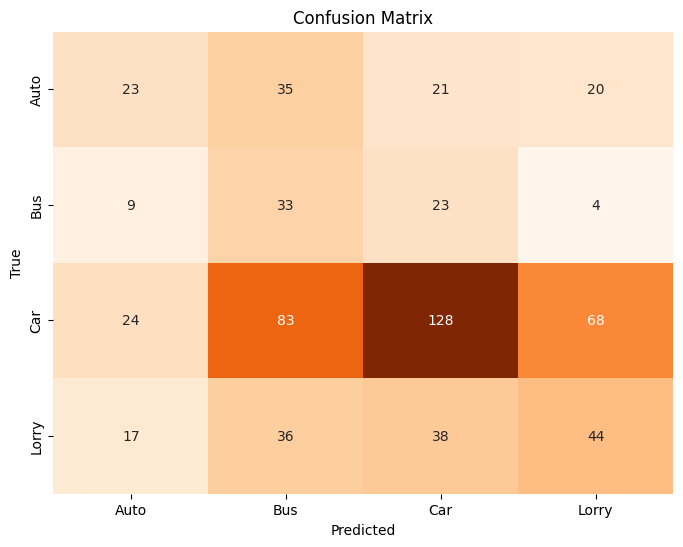

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the entire training set
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Naive Bayes with cross validation**

Cross-Validation Scores: [0.33402062 0.40909091 0.32644628 0.33471074 0.38842975]
Mean Accuracy: 0.3585
Test Accuracy: 0.3762
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        99
           1       0.18      0.48      0.26        69
           2       0.61      0.42      0.50       303
           3       0.32      0.33      0.32       135

    accuracy                           0.38       606
   macro avg       0.36      0.36      0.34       606
weighted avg       0.45      0.38      0.39       606



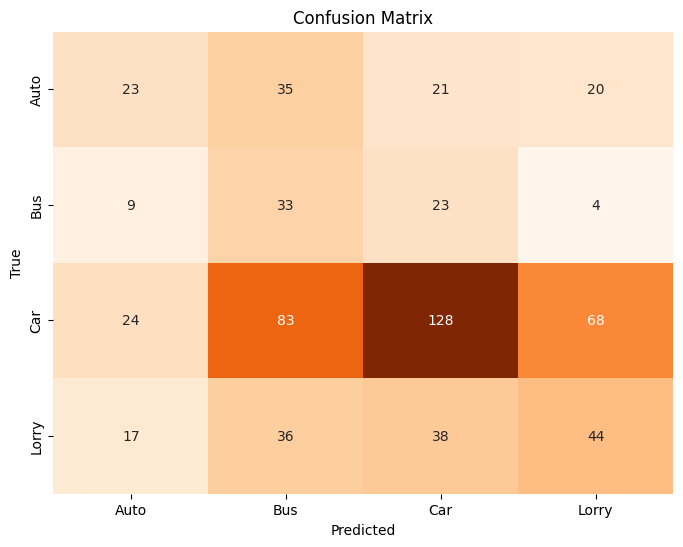

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation on the training set
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**SVM without cross validation**

Test Accuracy: 0.9587
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        99
           1       0.92      0.94      0.93        69
           2       0.97      0.99      0.98       303
           3       0.96      0.93      0.95       135

    accuracy                           0.96       606
   macro avg       0.95      0.95      0.95       606
weighted avg       0.96      0.96      0.96       606



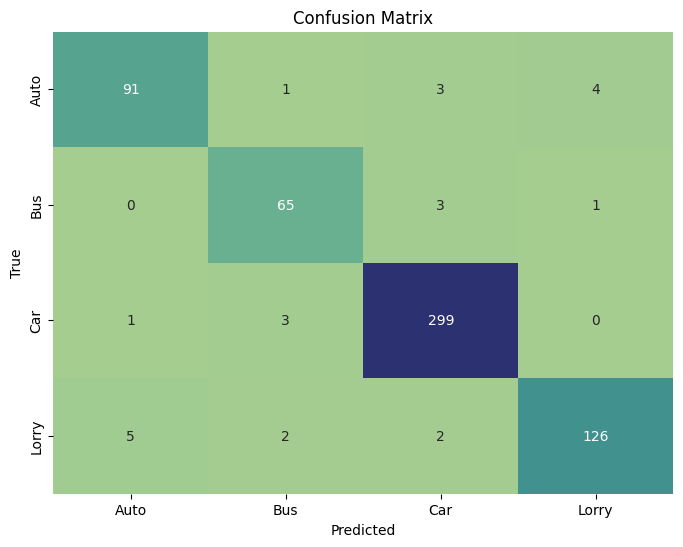

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a linear SVM model with a specified C parameter (adjust as needed)
svm_model = SVC(kernel='linear', C=0.8)

# Train the model on the entire training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**SVM with cross validation**

Cross-Validation Scores: [0.69278351 0.70247934 0.72933884 0.72933884 0.70041322]
Mean Accuracy: 0.7109
Test Accuracy: 0.7475
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        99
           1       0.88      0.22      0.35        69
           2       0.83      0.91      0.87       303
           3       0.61      0.78      0.68       135

    accuracy                           0.75       606
   macro avg       0.75      0.62      0.63       606
weighted avg       0.76      0.75      0.73       606



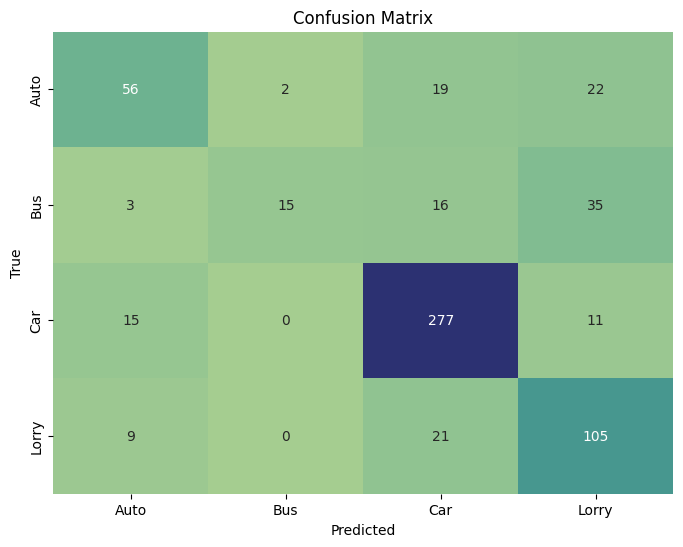

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a linear SVM model with a specified C parameter (adjust as needed)
svm_model = SVC(C=0.8)

# Perform cross-validation on the training set
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [34]:
import gc
gc.collect()

31645

Cross-Validation Scores: [0.91134021 0.92355372 0.90495868 0.94421488 0.92561983]
Mean Accuracy: 0.9219
Test Accuracy: 0.9587
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        99
           1       0.92      0.94      0.93        69
           2       0.97      0.99      0.98       303
           3       0.96      0.93      0.95       135

    accuracy                           0.96       606
   macro avg       0.95      0.95      0.95       606
weighted avg       0.96      0.96      0.96       606



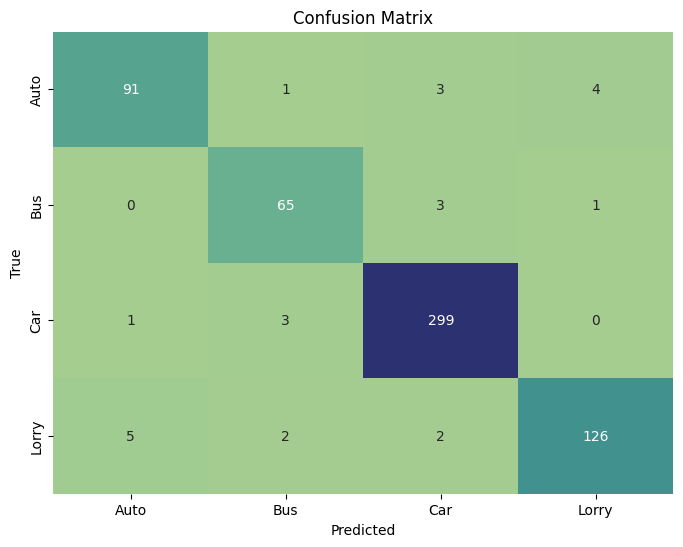

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a linear SVM model with a specified C parameter (adjust as needed)
svm_model = SVC(kernel='linear', C=0.8)

# Perform cross-validation on the training set
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**XGBoost without optimization**

Test Accuracy: 0.8597359735973598
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.98      0.67      0.79        69
           2       0.88      0.95      0.91       303
           3       0.80      0.84      0.82       135

    accuracy                           0.86       606
   macro avg       0.87      0.80      0.83       606
weighted avg       0.86      0.86      0.86       606



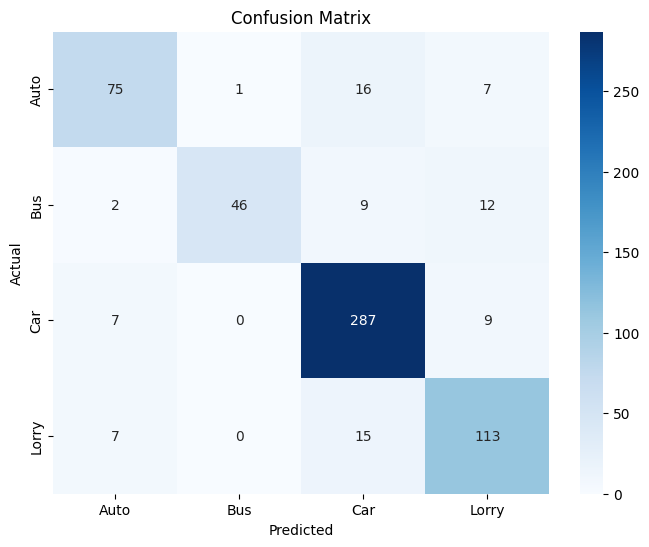

In [5]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameters
num_class = 4
n_estimators = 100  # Replace with your desired value
learning_rate = 0.1  # Replace with your desired value
max_depth = 3  # Replace with your desired value
subsample = 0.8  # Replace with your desired value
colsample_bytree = 0.8  # Replace with your desired value

# Create an XGBoost Classifier with the specified parameters
xg_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=num_class,
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    subsample=subsample
)

# Fit the model to the training data
xg_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_clf.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a colored confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Auto','Bus','Car','Lorry'], yticklabels=['Auto','Bus','Car','Lorry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:04:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:04:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:04:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

Test Accuracy: 0.8613861386138614
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.96      0.71      0.82        69
           2       0.89      0.94      0.92       303
           3       0.79      0.81      0.80       135

    accuracy                           0.86       606
   macro avg       0.87      0.81      0.83       606
weighted avg       0.86      0.86      0.86       606



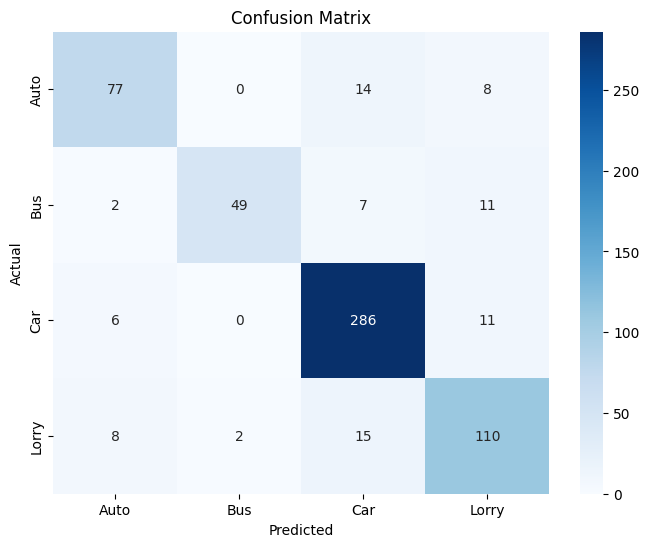

In [37]:
##### import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define the parameters
num_class = 3
n_estimators = 100  # Replace with your desired value
learning_rate = 0.1  # Replace with your desired value
max_depth = 3  # Replace with your desired value
subsample = 0.8  # Replace with your desired value
colsample_bytree = 0.8  # Replace with your desired value
gpu_id = 0  # Specify the GPU device ID

# Create an XGBoost Classifier with the specified parameters
xg_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=num_class,
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    subsample=subsample,
    tree_method='gpu_hist',  # Specify tree method for GPU
    gpu_id=gpu_id  # Specify GPU device ID
)

# Perform cross-validation on the training data
cv_scores = cross_val_score(xg_clf, X_train, y_train, cv=5)

# Fit the model to the training data
xg_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_clf.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot a colored confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Auto','Bus','Car','Lorry'], yticklabels=['Auto','Bus','Car','Lorry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()